# FYS-2021: Exercise set 4: Multivariate methods

(1a)
First out is linear regression. The book do not provide an explicit formula for this, but one may follow
https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc for developing the formulas.


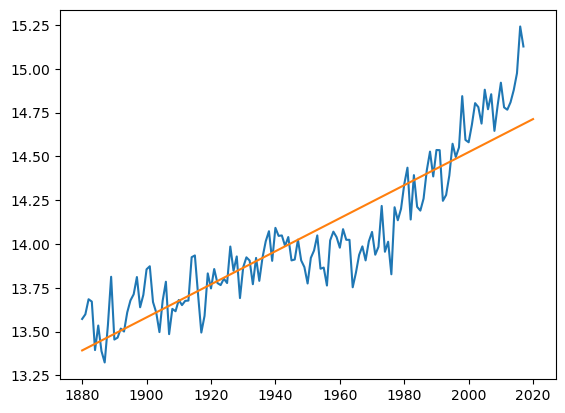

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y) :
    # calculate the slope (m) and intercept (b) of the best-fit line using OLS
    beta_1 = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x*x) - np.mean(x)**2)
    beta_0 = np.mean(y) - beta_1*np.mean(x)
    return beta_0, beta_1

def g(x, beta_0, beta_1):
    return beta_0 + x*beta_1


df = pd.read_csv("task-sheets/W37/global-temperatures.csv", sep=" ")
x = df['Year'].to_numpy()
y = df['Temp'].to_numpy()
plt.plot(x,y)

# Now, the linear model
beta_0, beta_1 = linear_regression(x,y)
X = np.arange(1880, 2020, 1/100)
Y = g(X, beta_0, beta_1)
plt.plot(X,Y)

plt.show()


(1b) The answer to this may be found in the book, page 82

In [3]:
E_RSE = np.sum((y-g(x, beta_0, beta_1))**2)/np.sum((y-np.mean(y))**2)

print(1-E_RSE)

0.8145436075330896


(1c) The interpretation of beta_1 would be the annual growth in temperature

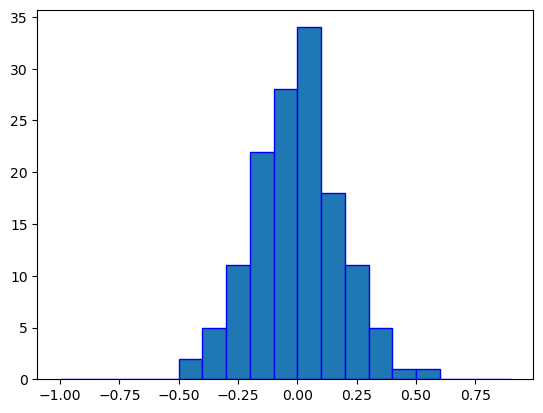

In [4]:
residuals = y - g(x, beta_0, beta_1)

bin = np.arange(-1,1,0.1)
plt.hist(residuals, bins=bin, edgecolor='blue')
plt.show()

(1d) Comment: The residuals seems to be very much normal distributed, which coincide very well with the assumption of constant variance of the residuals

(2a) The normal equation is given in (5.39) and to implement it we need to use numpy libraries for linear algebra.


In [5]:
df = pd.read_csv("task-sheets/W37/auto-mpg.csv", sep=" ")
x1 = df['cylinders'].to_numpy()
x2 = df['displacement'].to_numpy()
x3 = df['horsepower'].to_numpy()
x4 = df['weight'].to_numpy()
x5 = df['acceleration'].to_numpy()
x6 = df['model'].to_numpy()
bias = np.ones(x1.size)

y = df['fuel'].to_numpy()

X = np.vstack((bias,x1,x2,x3,x4,x5,x6))
X = X.transpose()
XX = np.matmul(X.transpose(),X)
XX_inv = np.linalg.inv(XX)
temp = np.matmul(XX_inv,X.transpose())
w = np.matmul(temp, y)
w

array([-1.45352505e+01, -3.29859089e-01,  7.67843024e-03, -3.91355574e-04,
       -6.79461791e-03,  8.52732469e-02,  7.53367180e-01])

(2b) Now, for the new prediction function g, it need to perform a dot product between the w-vector and the x-values. Let's just do this in one operation for all the samples

In [6]:
y_pred = np.matmul(X,w)

E_RSE = np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

print(1-E_RSE)

0.8092552890383932


(2a) First read in the sms-spam-bow.csv. I'm really not sure how to utilize it yet though...

In [48]:
bow_representation_of_messages = np.loadtxt("data/sms-spam-bow.csv", delimiter=" ", dtype=int)
print(bow_representation_of_messages.shape)


(5574, 8443)


Now we have the x_j^t BOW matrix, where j is the word-index column-wise, ranging from 0 to 8441 (first column is the ham(0)/spam(1) flag), and t is the sample index ranging from 0 to 5573.
First, let's find how many ham/spam messages there are

In [51]:
which_class = bow_representation_of_messages[:, 0]
N = bow_representation_of_messages.shape[0]

rows_with_ham=np.where(which_class==0)
rows_with_spam=np.where(which_class==1)


N_ham = np.size(rows_with_ham)
N_spam = np.size(rows_with_spam)

print ("Spams: ", N_spam, "Hams: ", N_ham)

BOW_samples = bow_representation_of_messages[:, 1:]
hams = BOW_samples[rows_with_ham,:]
spams = BOW_samples[rows_with_spam,:]

# Now, aggregate this matrix vertically. That is, find number of occurances of word j in all spam "documents".
N_hams_j = np.sum(hams, axis=1)
N_spams_j = np.sum(spams, axis=1)

# These are used for estimators for p_ij (eq. 5.31)
rel_freq_hams = N_hams_j/N_ham
rel_freq_spams = N_spams_j/N_spam

# The priors
P_ham = N_ham/N
P_spam = N_spam/N
P_ham
# Now


Spams:  747 Hams:  4827


0.8659849300322928